<b><h1 align="center">Regressão Linear e Correlação</h1><b>

</br>

</br>

</br>

</br>

</br>

<p><b>Autor:</b> Yuri José Soares de Araújo</p>

<p><b>Matrícula:</b> 1520658</p>

<p><b>Curso:</b> Engenharia de Computação</p>

&nbsp;

&nbsp;

&nbsp;

&nbsp;

<text align="right"> Fortaleza, 14 de Outubro de 2018</text>

&nbsp;

<h1 align="center">Introdução</h1>

<p align="left">Regressão linear é uma técnica bastante utilizada para descobrir se há e qual a correlação entre duas variáveis, estas chamadas de variável independente e dependente. O método de regressão linear é baseado no coeficiente de Pearson:</p>

\begin{align}
r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}} \\
\end{align}

<p>Que pode ser resumido em:</p>

\begin{align}
r = \frac{{S_{xy}}}{{\sqrt{S_{xx}.S_{yy}}}}
\end{align}

<p>Lembrando ainda que a fórmula descrita acima é valida se, e somente se, ${1 \leq r \leq 1}$, que é a variância descrita pelo coeficiente de Pearson. Em termos práticos, um ${r}$ mais próximo de ${-1}$ significa uma maior correlação negativa, já o contrário, quando o ${r}$ é próximo de ${1}$, existe uma maior correlação positiva. Quando o ${r}$ tende a zero podemos interpretar que não há correlação entre as duas variáveis.</p>

<p>O algoritmo de regressão linear é também um dos algoritmos de predição utilizados no <i>Machine Learning</i> mais populares devido a sua simplicidade. Na seção de análise irei realizar uma pequena demonstração do algoritmo utilizando a biblioteca <i>Scikit Learn</i> para calcular uma predição baseada em um dataset pré estabelecido.</p>

</br>

<h1 align="center">Objetivo Geral</h1>

<p>Por meio deste <i>Notebook</i> desejo utilizar de <i>Computação Interativa</i> para demonstrar e analisar dados de difícil compreensão e para isto escolhi a linguagem de programação <i>Python</i>, bastante reconhecida no meio acadêmico e com ampla aplicação na área de <i>Data Science</i> juntamente com seu <i>framework</i> de Análise de Dados, o <i>Jupyter Notebook</i>, que veio trazer algumas funcionalidade já reconhecidas no R Studio para o <i>Python</i>.</p>

</br>

<h1 align="center">Análise e Interpretação dos Dados</h1>

<p>A seguir irei fazer uma demonstração dos algoritmo de Regressão Linear e seu uso em <i>Machine Learning</i> com predição de dados. Como sugerido na introdução, irei explicar passo a passo cada resultado para que até iniciantes em Ciência de Dados ou mesmo em <i>Python</i> possam acompahar.</p>

<p>Ao final de cada seção, irei fazer uma breve revisão para fixar o conteúdo ensinado e para que possamos passar para o próximo estágio sem dúvidas.</p>

</br>

<p>Começando pelo bloco abaixo, onde apenas chamo as bibliotecas matemáticas que irei utilizar para me ajudar durante o processo de análise, manipulação e visualização dos dados.</p>

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt # invocando o método pyplot para plotar os dados
import numpy as np # biblioteca de manipulação dos dados
import pandas as pd # o mesmo que a de cima, porém mais simples e mais limitada
from sklearn import linear_model # biblioteca que guarda algoritmos de Machine Learning 
from sklearn.metrics import mean_squared_error, r2_score # funções de métrica para avaliar o meu treinamento

<p>Agora vou carregar o dataset da planilha para a memória para que possa ser manipulado e utilizarei as colunas 7 e 8, equivalentes a coluna "Número de Pessoas na Família" e a coluna de "Lixo Gerado".</p>

In [22]:
df = pd.read_excel('../data/database.xls', usecols=[7, 8])

<p>Exibe as primeiras 5 entradas do dataset, lembrando que assim como muitas linguagens de programação, o <i>Python</i> considera o primeiro índice de uma lista como ${0}$, então lembre-se de fazer essa subtração quando estiver olhando para a planilha. Deixei esta função apenas para validar se os dados e os nomes das colunas estavam inseridos de forma correta.</p>

In [3]:
df.head()

,Nº de Pessoas na Família,Lixo Gerado
0,2,64
1,1,32
2,1,40
3,2,73
4,2,64


In [13]:
x_axis_train = df['Nº de Pessoas na Família'].values[:30].reshape(-1, 1)
y_axis_train = df['Lixo Gerado'].values[:30].reshape(-1, 1)
x_axis_test = df['Nº de Pessoas na Família'].values[30:].reshape(-1, 1)
y_axis_test = df['Lixo Gerado'].values[30:].reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x_axis_train, y_axis_train)
y_axis_pred = regr.predict(x_axis_test)

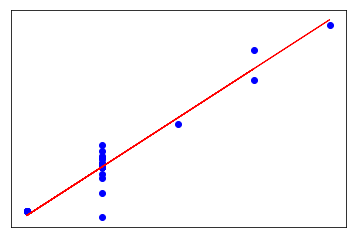

In [15]:
plt.scatter(x_axis_test, y_axis_test, color='blue')
plt.plot(x_axis_test, y_axis_pred, color='red', linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()

In [51]:
print('Média para as variáveis')
df.mean()

Média para as variáveis


Nº de Pessoas na Família     2.05
Lixo Gerado                 66.15
dtype: float64

In [52]:
df.median()

Nº de Pessoas na Família     2.0
Lixo Gerado                 64.0
dtype: float64

In [53]:
df.std()

Nº de Pessoas na Família     0.909926
Lixo Gerado                 33.968991
dtype: float64

In [54]:
df['Nº de Pessoas na Família'].var()

0.8279661016949149

In [55]:
df['Lixo Gerado'].var()

1153.8923728813566

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
Nº de Pessoas na Família    60 non-null int64
Lixo Gerado                 60 non-null int64
dtypes: int64(2)
memory usage: 1.0 KB


In [57]:
regr = linear_model.LinearRegression()

In [94]:
regr.fit(x_axis.reshape(-1, 1), y_axis.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
df_predict = regr.predict(x_axis.reshape(-1, 1))

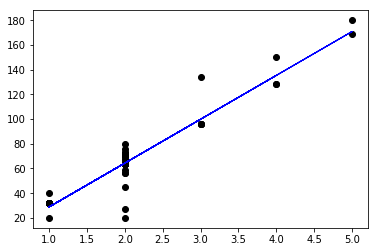

In [119]:
plt.scatter(x_axis, y_axis, color='black')
plt.plot(x_axis, df_predict, color='blue', linewidth=1)
plt.show()

In [115]:
df.head()

,Nº de Pessoas na Família,Lixo Gerado
0,2,64
1,1,32
2,1,40
3,2,73
4,2,64


<h1 align="center">Referências Bibliográficas</h1>

<p>POLAMURI, Saimadhu. "Data Mining with Python: Implementing Classification and Regression". Packt Publishing Company (2016)</p>

<p>https://www.eecis.udel.edu/~portnoi/classroom/prob_estatistica/2006_2/lecture_slides/aula20.pdf</p>

<p>BURGER, Scott V. "Introduction to Machine Learning with R". O'Reilly Media (2018)</p>